In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def metrica_euclidiana (x, y):
    """Recebe dois pontos N-dimensionais e retorna a distância euclidiana entre eles.
    x, y: objetos numpy com as coordenadas do ponto. Exemplo: x = [x_1, x_2, ..., x_n]"""

    d2 = ((x[0] - y[0])**2) + ((x[1] - y[1])**2)
    d  = np.sqrt(d2)
        
    return d


def metrica_maximo (x, y):
    """Recebe dois pontos N-dimensionais e retorna a distância da métrica do máximo entre eles.
    x, y: objetos numpy com as coordenadas do ponto. Exemplo: x = [x_1, x_2, ..., x_n]"""

    d = max(abs(x[0] - y[0]), abs(x[1] - y[1]))

    return d


def metrica_soma (x, y):
    """Recebe dois pontos N-dimensionais e retorna a distância da métrica da soma entre eles.
    x, y: objetos numpy com as coordenadas do ponto. Exemplo: x = [x_1, x_2, ..., x_n]"""

    d = abs(x[0] - y[0])+ abs(x[1] - y[1])
        
    return d

def metrica_zero_um (x, y):
    """Recebe dois pontos N-dimensionais e retorna a distância da métrica da zero-um entre eles.
    x, y: objetos numpy com as coordenadas do ponto. Exemplo: x = [x_1, x_2, ..., x_n]"""
    
    if np.array_equal(x, y):
        return 0
    
    return 1

In [3]:
def ponto_medio_euclidiano(p, v):
    d = metrica_euclidiana(p,v)    
    p_novo = ((p[0]+v[0])/2, (p[1]+v[1])/2) 
    d_novo = round(metrica_euclidiana(p_novo,v),5)
    
    return d, p_novo, d_novo


def ponto_medio_soma(p, v):
    p1,p2 = p
    v1,v2 = v
    
#     m1 = np.linspace(min(p1,v1), max(p1,v1)+0.0125, 1000)
    
# #     iguais == p1 <= v1 and p2 <= v2 or p1 => v1 and p2 => v2 
# #     diferentes == p1 <= v1 and p2 => v2 or p1 <= v1 and p2 => v2 
    
#     if (p1 <= v1 and p2 <= v2) or (p1 >= v1 and p2 >= v2): #iguais:
#         m2_f = f"{(p1+p2+v1+v2)/2} - x" #x=m1
#     elif (p1 < v1 and p2 > v2) or (p1 > v1 and p2 < v2): #diferentes:
#         m2_f = f"{(-p1+p2-v1+v2)/2} + x" #x=m1
#     else: 
#         print("erro!")
#         print(p,v)
    
#     m2 = aplica_funcao(m1,m2_f) 
    
    d = metrica_soma(p,v)  
    
    if abs(p1-v1) >= d/2:
        #print("delta x >= R")
        if (p1 <= v1 and p2 <= v2) or (p1 >= v1 and p2 >= v2): #iguais
            #print("iguais")
            r1 = (min(p1,v1) + d/2, min(p2,v2))
            r2 = (max(p1,v1) - d/2, max(p2,v2))
        else:
            #print("diferentes")
            r1 = (min(p1,v1) + d/2, max(p2,v2))
            r2 = (max(p1,v1) - d/2, min(p2,v2))
    else: 
        #print("delta x < R")
        if (p1 <= v1 and p2 <= v2) or (p1 >= v1 and p2 >= v2): #iguais
            #print("iguais")
            r1 = (min(p1,v1), min(p2,v2) + d/2)
            r2 = (max(p1,v1), max(p2,v2) - d/2)
            
        else:
            #print("diferentes")
            r1 = (max(p1,v1), min(p2,v2) + d/2)
            r2 = (min(p1,v1), max(p2,v2) - d/2)
    
    #p_lista = [(m1[i], m2[i]) for i in range(len(m1))]
    p_lista = [((1-n)*r1[0] + n*r2[0], (1-n)*r1[1] + n*r2[1]) for n in np.linspace(0.0125,1,1000)]
    d_lista =  [round(metrica_soma(v, m),5) for m in p_lista]
    
    return d, p_lista, d_lista

def ponto_medio_maximo(p, v):
    p1,p2 = p
    v1,v2 = v
        
    d = metrica_maximo(p,v)  
    
    if abs(p1-v1) == d:
        r1 = (min(p1,v1)+d/2, max(p2,v2)-d/2)
        r2 = (min(p1,v1)+d/2, min(p2,v2)+d/2)
    elif abs(p1-v1) < d:
        r1 = (max(p1,v1)-d/2, min(p2,v2)+d/2)
        r2 = (min(p1,v1)+d/2, min(p2,v2)+d/2)
    else: 
        return "Erro! delta x > d"
    
    p_lista = [((1-n)*r1[0] + n*r2[0], (1-n)*r1[1] + n*r2[1]) for n in np.linspace(0.0125,1,1000)]
    d_lista =  [round(metrica_maximo(v, m),5) for m in p_lista]
    
    return d, p_lista, d_lista

In [4]:
def circunferencia(A, R):
    a1, a2 = A
    circ = []

    for i in range(1000):
        theta = 2 * math.pi * i / 1000
        x = a1 + R * math.cos(theta)
        y = a2 + R * math.sin(theta)
        circ.append((x, y))

    return circ

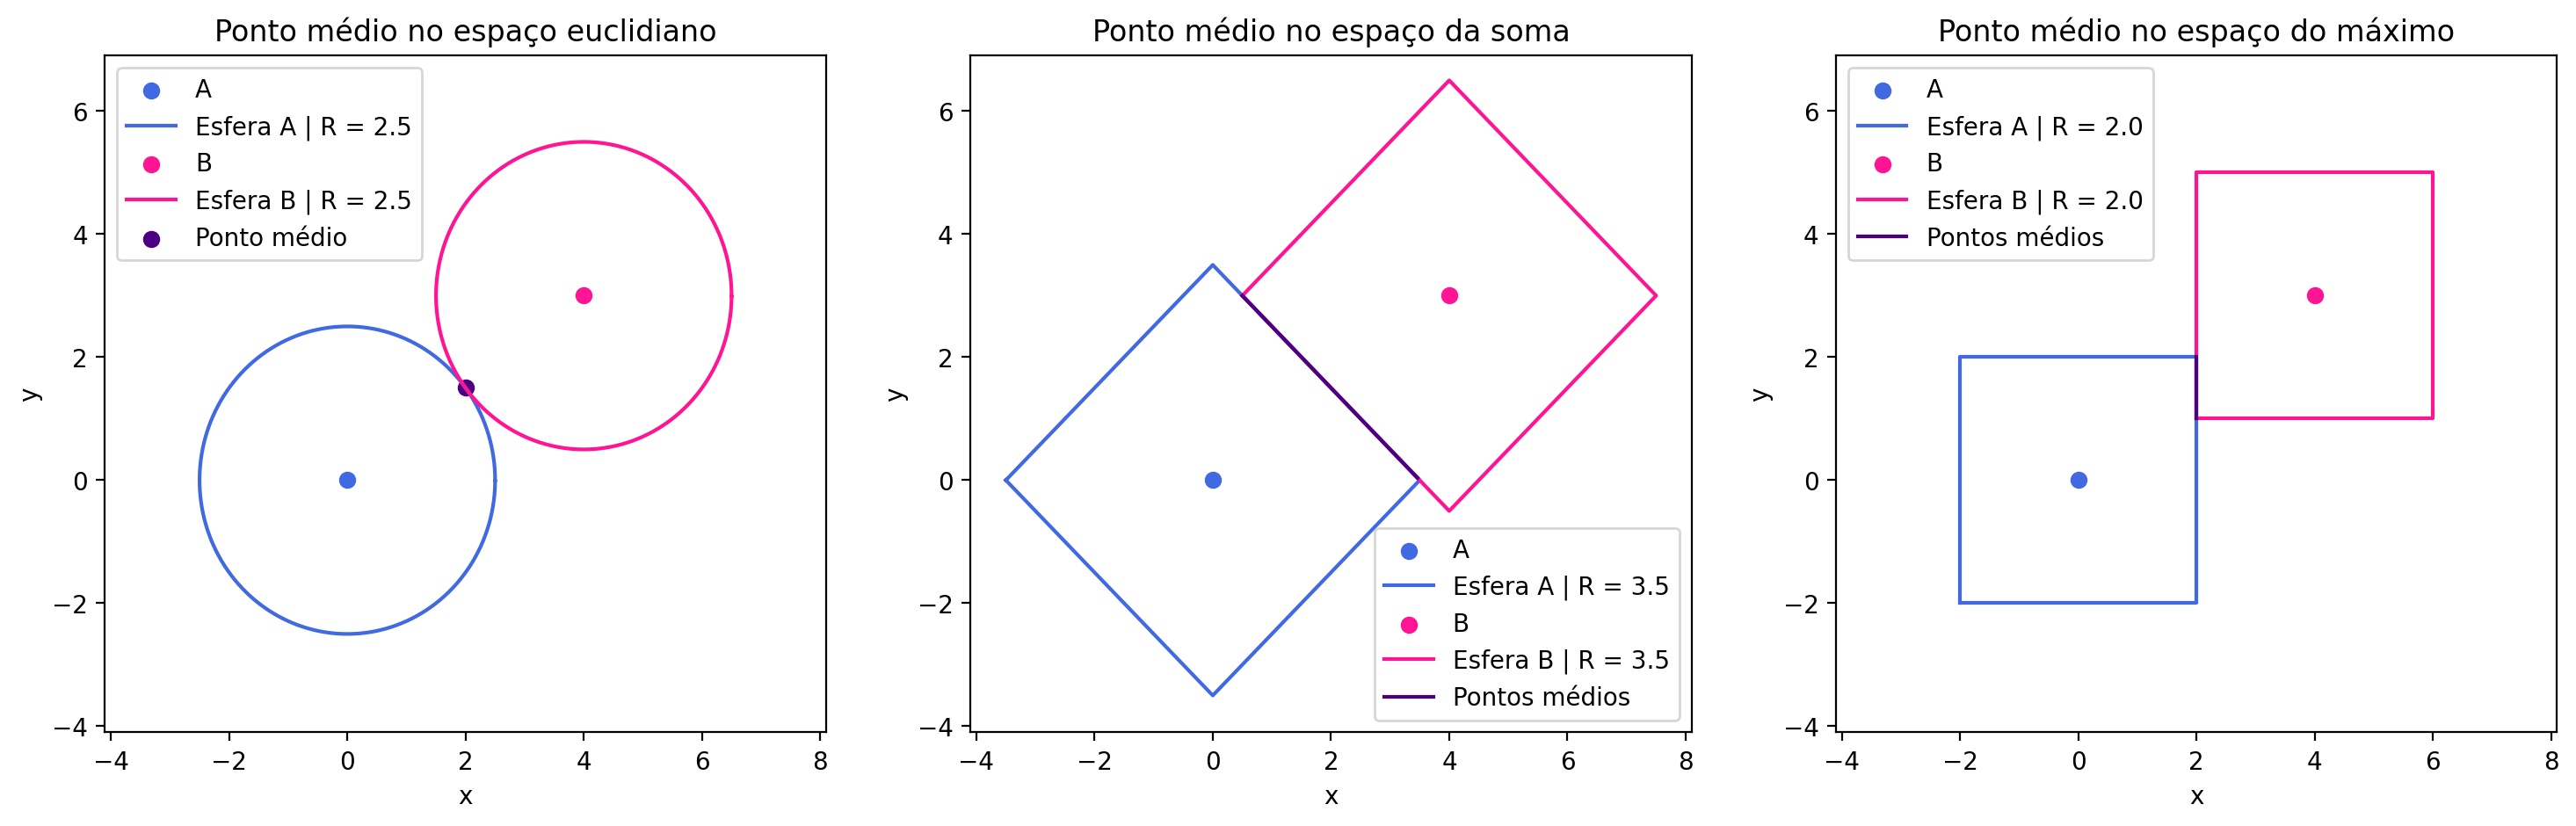

In [6]:
#pontos
A = (0,0)
B = (4,3)

#esferas euclidianas
de, pme, dme = ponto_medio_euclidiano(A,B)
esfA_e =  circunferencia(A, dme)
esfB_e =  circunferencia(B, dme)

#esferas da soma
ds, pms, dms = ponto_medio_soma(A,B)
esfA_s = [(A[0]-dms[0], A[1]),(A[0], A[1]+dms[0]),(A[0]+dms[0], A[1]),(A[0], A[1]-dms[0]),(A[0]-dms[0], A[1])]
esfB_s = [(B[0]-dms[0], B[1]),(B[0], B[1]+dms[0]),(B[0]+dms[0], B[1]),(B[0], B[1]-dms[0]),(B[0]-dms[0], B[1])]

#esferas do máximo
dm, pmm, dmm = ponto_medio_maximo(A,B)
esfA_m = [(A[0]-dmm[0], A[1]-dmm[1]),(A[0]-dmm[0], A[1]+dmm[0]),(A[0]+dmm[0], A[1]+dmm[0]),(A[0]+dmm[0], A[1]-dmm[0]),(A[0]-dmm[0], A[1]-dmm[1])]
esfB_m = [(B[0]-dmm[0], B[1]-dmm[1]),(B[0]-dmm[0], B[1]+dmm[0]),(B[0]+dmm[0], B[1]+dmm[0]),(B[0]+dmm[0], B[1]-dmm[0]),(B[0]-dmm[0], B[1]-dmm[1])]

fig, ax = plt.subplots(1,3, figsize=(18,5), dpi=200)
ax[0].scatter(A[0], A[1], color = "royalblue", label = "A")
ax[0].plot([esfA_e[i][0] for i in range(len(esfA_e))], [esfA_e[i][1] for i in range(len(esfA_e))], color = "royalblue", label = f"Esfera A | R = {dme}")
ax[0].scatter(B[0], B[1], color = "deeppink", label = "B")
ax[0].plot([esfB_e[i][0] for i in range(len(esfB_e))], [esfB_e[i][1] for i in range(len(esfB_e))], color = "deeppink", label = f"Esfera B | R = {dme}")
ax[0].scatter(pme[0], pme[1], color = "indigo", label = "Ponto médio")


ax[1].scatter(A[0], A[1], color = "royalblue", label = "A")
ax[1].plot([esfA_s[i][0] for i in range(len(esfA_s))], [esfA_s[i][1] for i in range(len(esfA_s))], color = "royalblue", label = f"Esfera A | R = {dms[0]}")
ax[1].scatter(B[0], B[1], color = "deeppink", label = "B")
ax[1].plot([esfB_s[i][0] for i in range(len(esfB_s))], [esfB_s[i][1] for i in range(len(esfB_s))], color = "deeppink", label = f"Esfera B | R = {dms[0]}")
ax[1].plot([pms[i][0] for i in range(len(pms))], [pms[i][1] for i in range(len(pms))], color = "indigo", label = "Pontos médios")


ax[2].scatter(A[0], A[1], color = "royalblue", label = "A")
ax[2].plot([esfA_m[i][0] for i in range(len(esfA_m))], [esfA_m[i][1] for i in range(len(esfA_m))], color = "royalblue", label = f"Esfera A | R = {dmm[0]}")
ax[2].scatter(B[0], B[1], color = "deeppink", label = "B")
ax[2].plot([esfB_m[i][0] for i in range(len(esfB_m))], [esfB_m[i][1] for i in range(len(esfB_m))], color = "deeppink", label = f"Esfera B | R = {dmm[0]}")
ax[2].plot([pmm[i][0] for i in range(len(pmm))], [pmm[i][1] for i in range(len(pmm))], color = "indigo", label = "Pontos médios")

ax[0].set_xlabel("x"); ax[0].set_ylabel("y"); 
ax[1].set_xlabel("x"); ax[1].set_ylabel("y"); 
ax[2].set_xlabel("x"); ax[2].set_ylabel("y"); 

ax[0].set_xlim(-4.1, 8.1); ax[0].set_ylim(-4.1, 6.9) 
ax[1].set_xlim(-4.1, 8.1); ax[1].set_ylim(-4.1, 6.9) 
ax[2].set_xlim(-4.1, 8.1); ax[2].set_ylim(-4.1, 6.9) 

ax[0].set_title("Ponto médio no espaço euclidiano")
ax[1].set_title("Ponto médio no espaço da soma")
ax[2].set_title("Ponto médio no espaço do máximo")

ax[0].legend();ax[1].legend();ax[2].legend();